# Running CrySF on Li$_{10}$GeP$_{2}$S$_{12}$

This directory includes all the essential files and instructions for running CrySF on the AIMD (VASP) trajectory of the Li$_{10}$GeP$_{2}$S$_{12}$ (LGPS) unit cell. The simulations were performed over a duration of 200 ps at a temperature of 650 K, with trajectory snapshots taken at 0.015 ps intervals.

The crystal structure of LGPS is represented with the following color scheme: Ge in violet, P in purple, S in yellow, and Li in green.

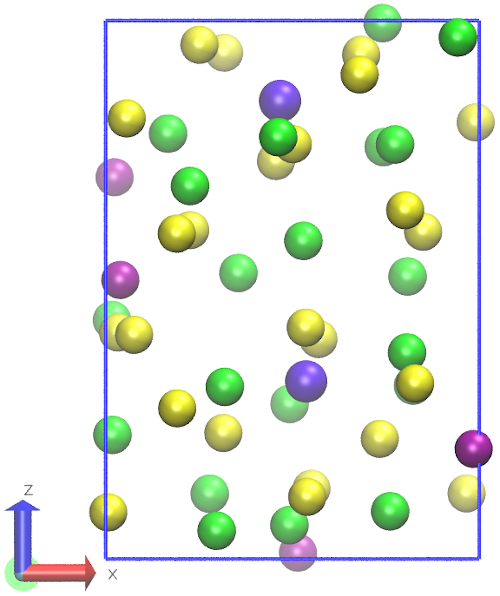

In [1]:
from PIL import Image
from IPython.display import display

# Specify the image path
image_path = './lgps.png'

# Open the image, strip metadata by creating a new image, and display
try:
    img = Image.open(image_path)
    img_without_metadata = Image.new(img.mode, img.size)
    img_without_metadata.paste(img)
    display(img_without_metadata)
except Exception as e:
    print(f"An error occurred: {e}")

## 1. Generate a density map
To generate a density map, execute the DensityMap function. This function will create the files 
- DensityMap.dat
- VoxelIndices.dat
- CHGCAR_VESTA. 

In [4]:
from libraries.DensityMap import DensityMap
from timeit import default_timer as timer

to = 'topo.gro' #Name of topology file (.gro or .data formats
tr = 'trajectory.xtc' #'Name of trajectory file'
f = 'XDATCAR' #Format options: XTC, TRR, LAMMPS, XDATCAR'
ts = 0.015 #Time interval between frames in the trajectory'
v = 0.3 #'Voxel size')
a = 'Li' #Atom selection: integer (index) or string (name) based on trajectory format'
tts = 1 #Frames interval to print the VoxelIndices.dat file'
clus = 0 #Set whether clustering <di> of the trajectory is applied (0 = NO or 1 = YES)'
verb = 0 #Set verbosity level when clus = 1 (0 = L and HM or 1 = L, M, H and HM)'

start = timer()
DensityMap(to, tr, f, ts, v, a)

end = timer() 
elapsed_time = (end - start) / 60 
print(f"time elapsed = {elapsed_time:.4f} minutes")

>> Reading the trajectory <<
>> Calculating density map <<
Format: XDATCAR
Number frames DensityMap: 13979
Diffusive atoms: 20
Voxel size: 0.3
Number voxels: 35322

Writing file: DensityMap.dat
Time interval between frames DensityMap: 0.0150

Writing file: VoxelIndices.dat
Time interval between frames VoxelIndices: 0.0150
Number of frames VoxelIndices: 13979

Writing file: CHGCAR_VESTA
>> Done <<

time elapsed = 0.1223 minutes


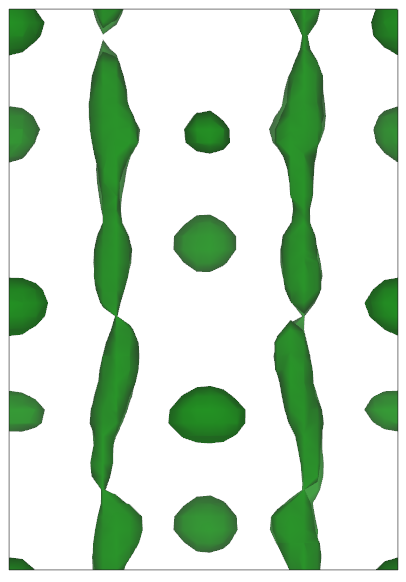

In [7]:
# Specify the density map  in the CHGCAR format of VASP
image_path = './CHGCAR_VESTA.png'

# Open the image, strip metadata by creating a new image, and display
try:
    img = Image.open(image_path)
    img_without_metadata = Image.new(img.mode, img.size)
    img_without_metadata.paste(img)
    display(img_without_metadata)
except Exception as e:
    print(f"An error occurred: {e}")

## 2. Execute CrySF
To generate a density map, execute the CrySF function. This function will create the files:

Figure files
- site_shapes_variance.png
- site_amplitudes.png
- sites_visited.png
  
Data files 
- SitesMap.dat
- jumps_info.dat
- simultaneous_jumps.dat
- string_frequency.dat
- SitesMap_OVITO.dat

## 2. Execute CrySF

In [5]:
from libraries.CrySF import CrySF 
 
nts = 0.015 #Time interval between frames in VoxelIndices.dat (-ts * -tts)
minv =  0.28 #Minimum volume condition for the site
maxv = 3.05 #Maximum volume condition for the site
verb = 0 #Set verbosity level when clus = 1, 0 = L and HM(together) or 1 = L, M, H and HM(together)
deltf = 4 #Eevery how many frames the trajectory is used to calculate the jump coeficient, simultaneous jumps
scaler = 'MinMaxScaler' #Scaler method used for site type identification. Options: MinMaxScaler, StandardScaler
clus = 0 #Set whether clustering <di> of the trajectory is applied (0 = NO or 1 = YES)
dop = 0 #Sets whether to use a doped density map, 0 = NO or 1 = YES

start = timer()

CrySF(nts, minv, maxv, verb, deltf)

end = timer()
elapsed_time = (end - start) / 60
print(f"\ntime elapsed = {elapsed_time:.4f} minutes")

>> Finding the density cutoff for clustering <<
Final Density cutoff: 0.1770

Amplitude types: 3
Site amplitudes type 0: 0.7721
Site amplitudes type 1: 1.0033
Site amplitudes type 2: 1.2893
Distance used as cutoff in NN type 0: 3.7293
Distance used as cutoff in NN type 1: 3.6015
Distance used as cutoff in NN type 2: 3.6062

>> Sites map of the structure <<
Writing file: SitesMap.dat

Information for site type
Label site: 0, Number of Sites: 8
Label site: 1, Number of Sites: 9
Label site: 2, Number of Sites: 7

Reading file: VoxelIndices.dat
>> Trajectory data <<
Total time: 209.6700
Time step VoxelIndices: 0.015

Writing file: jumps_info.dat
Writing file: simultaneous_jumps.dat
Writing file: string_frequency.dat

Frames interval: 4
Time interval between frame intervals: 0.0600
Updated total time: 209.5800

time elapsed = 0.0804 minutes


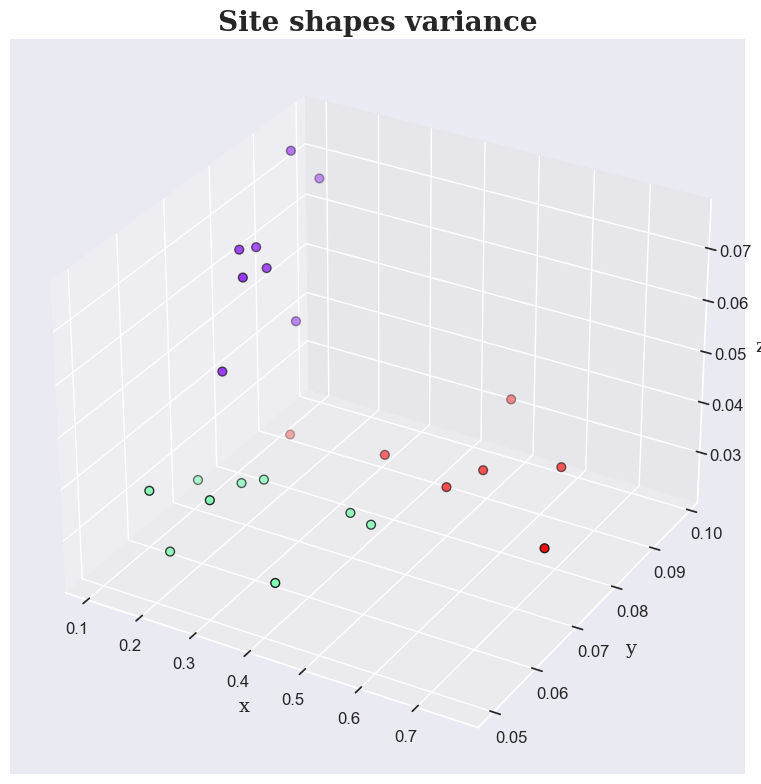

In [18]:
f# Load and display the image
image_path = './site_shapes_variance.png'
try:
    img = Image.open(image_path)
    img_without_metadata = Image.new(img.mode, img.size)
    img_without_metadata.paste(img)
    display(img_without_metadata)
except Exception as e:
    print(f"An error occurred: {e}")

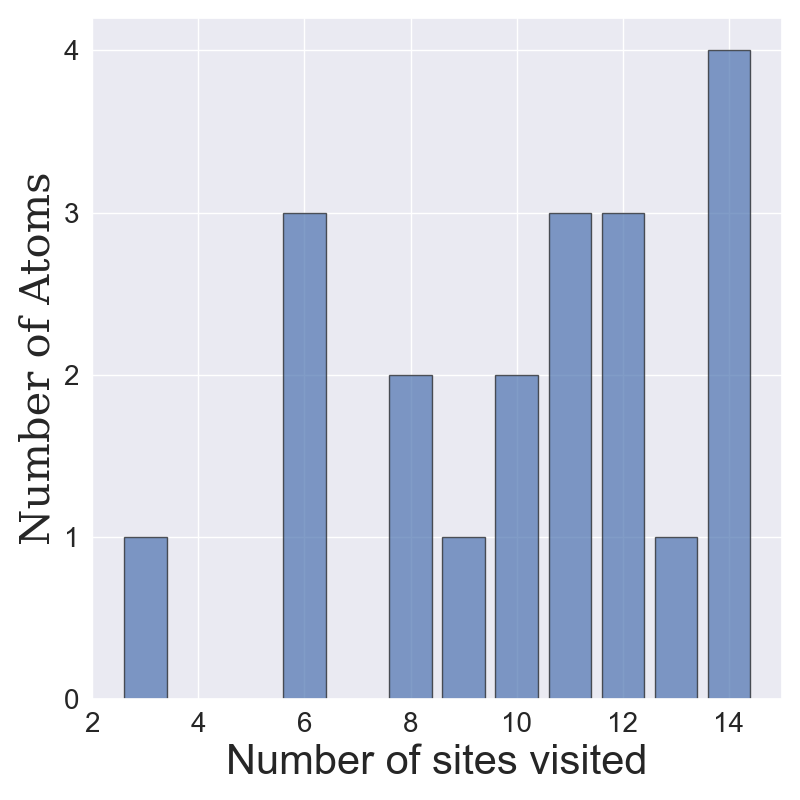

In [6]:
image_path = './sites_visited.png'
try:
    img = Image.open(image_path)
    img_without_metadata = Image.new(img.mode, img.size)
    img_without_metadata.paste(img)
    display(img_without_metadata)
except Exception as e:
    print(f"An error occurred: {e}")

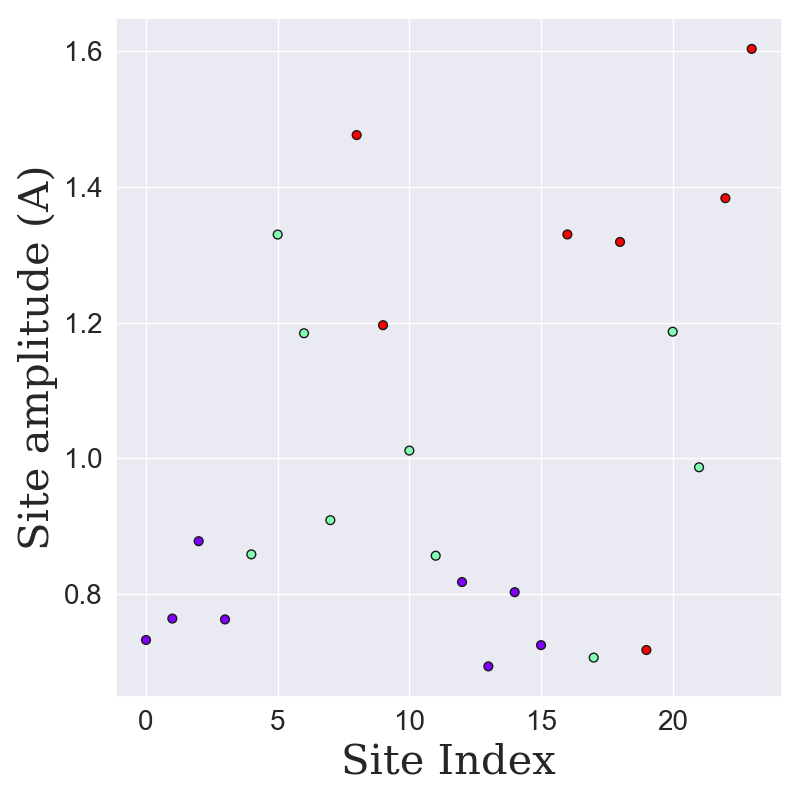

In [16]:
image_path = './site_amplitudes.png'
try:
    img = Image.open(image_path)
    img_without_metadata = Image.new(img.mode, img.size)
    img_without_metadata.paste(img)
    display(img_without_metadata)
except Exception as e:
    print(f"An error occurred: {e}")

The file SitesMap_OVITO.dat can be visualized using the software OVITO. Below is an example of the type of figure that can be generated with this tool. In the plot, each color represents a distinct crystallographic site.

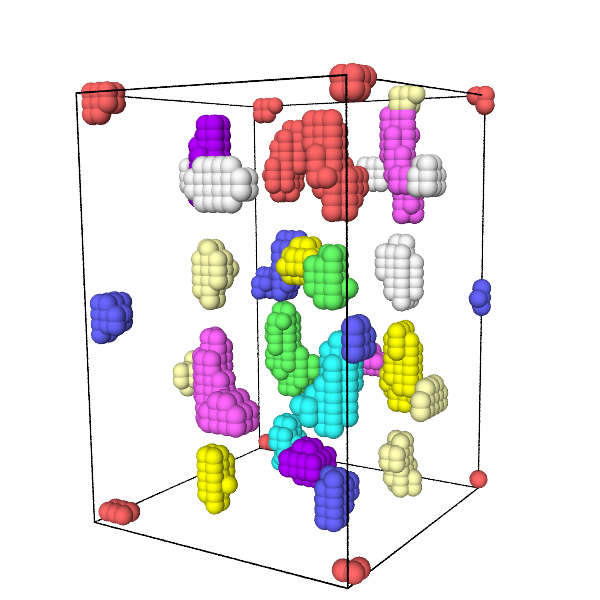

In [9]:
image_path = './SitesMap_ovito.png'
try:
    img = Image.open(image_path)
    img_without_metadata = Image.new(img.mode, img.size)
    img_without_metadata.paste(img)
    display(img_without_metadata)
except Exception as e:
    print(f"An error occurred: {e}")

The other four files:
- jumps_info.dat
- simultaneous_jumps.dat
- string_frequency.dat

can be visualized as follow

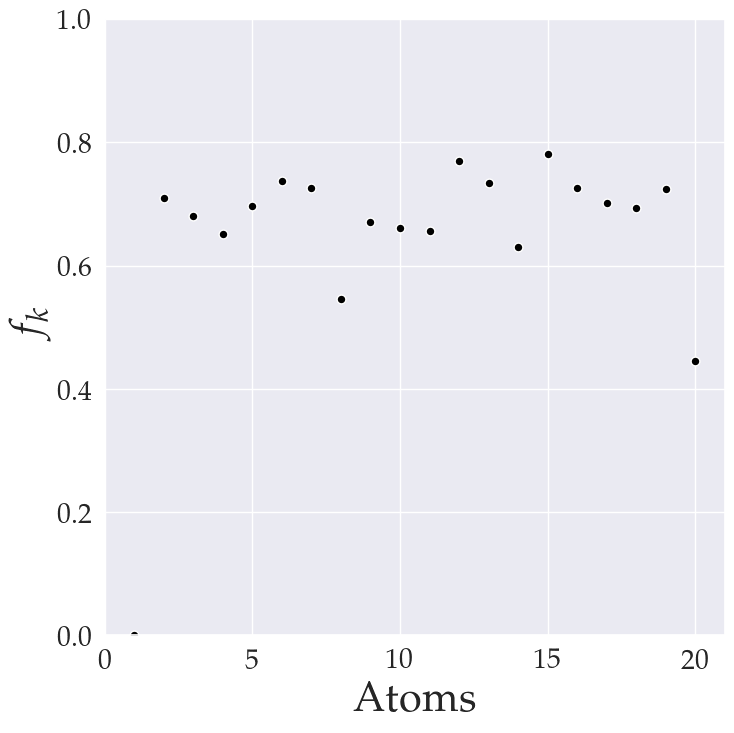

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter
from matplotlib.ticker import MaxNLocator

import seaborn           as sns
sns.set_theme()

# Update the matplotlib settings for LaTeX integration
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

def plot_jumps_info(filename):
    data = pd.read_csv(filename, sep=r'\s+', comment='#', header=None,
                       names=['Atom', 'NJumps', 'RNJumps', 'SelfCorr'])
   
    plt.figure(figsize=(8.0, 8.0))
    colors = ['red' if x == -1 else 'black' for x in data['SelfCorr']]
    edgecolors = ['red' if x == -1 else 'white' for x in data['SelfCorr']]
    for color, edgecolor, (x, y) in zip(colors, edgecolors, data[['Atom', 'SelfCorr']].values):
        plt.scatter(x, y, color=color, edgecolor=edgecolor, marker='o', s=40)
    plt.ylim(0, 1)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlim(0, data['Atom'].max() + 1)
    plt.xlabel(r'Atoms', fontsize=30)
    plt.ylabel(r'$f_{k}$', fontsize=30)
    plt.tick_params(axis='both', labelsize=20)
    plt.savefig('self_corr.png')
    plt.show()

plot_jumps_info('jumps_info.dat')


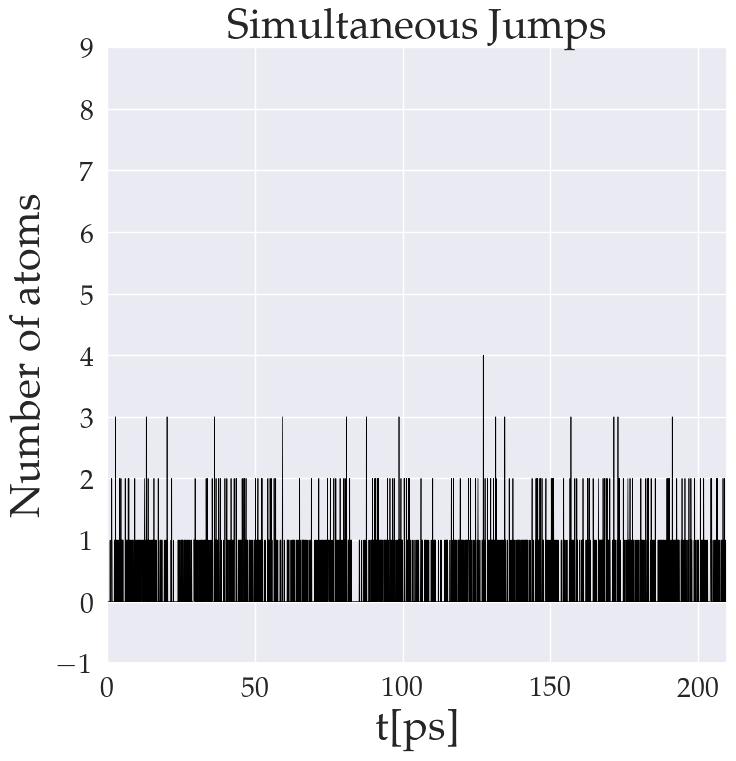

In [11]:
def plot_simultaneous_jumps(filename, delt_ps, deltf):
    data = pd.read_csv(filename, sep=r'\s+', comment='#', header=None,
                       names=['Frame', 'NSjumps'])
    plt.figure(figsize=(8.0, 8.0))
    plt.plot(data['Frame'] * delt_ps * deltf, data['NSjumps'], linestyle='-', color='black', linewidth=0.5)
    plt.ylim(-1, data['NSjumps'].max() + 5)
    plt.xlim(0, data['Frame'].max() * delt_ps * deltf)
    plt.xlabel(r't[ps]', fontsize=30)
    plt.ylabel(r'Number of atoms', fontsize=30)
    plt.title(r'Simultaneous Jumps', fontsize=30)
    plt.tick_params(axis='both', labelsize=20)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig('simultaneous_jumps.png')
    plt.show()

plot_simultaneous_jumps('simultaneous_jumps.dat', delt_ps=0.015, deltf=4)

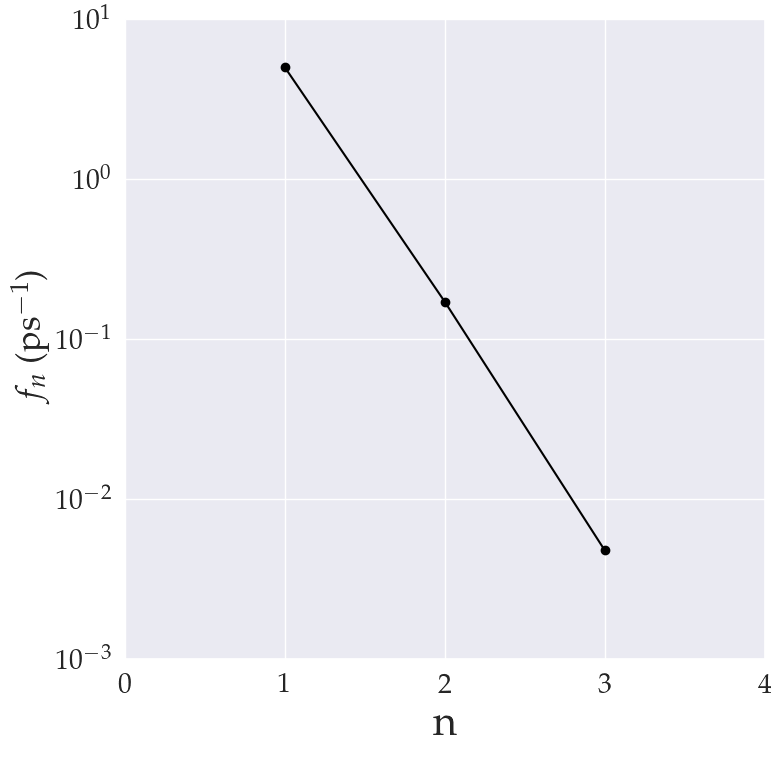

In [17]:
def log_format(y, _):
    return f'$10^{{{int(np.log10(y))}}}$' if y != 0 else '0'

def plot_string_probability(filename):
    data = pd.read_csv(filename, sep=r'\s+', comment='#', header=None, skiprows=1,
                       names=['String Length (#n)', 'f_n(ps^-1)'])
    plt.figure(figsize=(8.0, 8.0))
    plt.plot(data['String Length (#n)'], data['f_n(ps^-1)'], marker='o', linestyle='-', color='black')

    max_length = data['String Length (#n)'].max()
    plt.xlim(0, max_length + 1)
    plt.xticks(np.arange(0, max_length + 2, 1))

    plt.ylim(0.001, 10)
    plt.yscale('log')
    plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())
    plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(log_format))

    plt.xlabel(r'n', fontsize=30)
    plt.ylabel(r'$f_{n}$ (ps$^{-1}$) ', fontsize=25)
    plt.tick_params(axis='both', labelsize=20)
    plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
    plt.savefig('string_prob.png')
    plt.show()
    
plot_string_probability('string_frequency.dat')